In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
ibm_data = pd.read_csv('../capstone2_ibm_churn/ibm_employeechurn.csv')

In [3]:
ibm_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
ibm_data.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [5]:
#Checked for missing values and did not find any
missing = pd.concat([ibm_data.isnull().sum(), 100 * ibm_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Age,0,0.0
MonthlyRate,0,0.0
NumCompaniesWorked,0,0.0
Over18,0,0.0
OverTime,0,0.0
PercentSalaryHike,0,0.0
PerformanceRating,0,0.0
MonthlyIncome,0,0.0
RelationshipSatisfaction,0,0.0
StockOptionLevel,0,0.0


In [6]:
#In this section, we check for mispelled words or other errors in fields with datatype = object. No errors were found.
ibm_data.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [7]:
ibm_data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
ibm_data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
ibm_data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
ibm_data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [11]:
ibm_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
ibm_data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [13]:
ibm_data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [14]:
ibm_data['Over18'].unique()

array(['Y'], dtype=object)

In [15]:
ibm_data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
#Getting a feel for rate of attrition
ibm_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [17]:
#Reviewing columns to see if any might be irrelevant
ibm_data.columns 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
ibm_data['EmployeeCount'].min()

1

In [19]:
ibm_data['EmployeeCount'].max()

1

In [20]:
#All employees have an 'EmployeeCount' value of 1 making the measure irrelevant to analysis. Measure will be dropped from df.
ibm_data = ibm_data.drop(columns = 'EmployeeCount')

In [21]:
#Checking to make sure 'EmployeeCount' has been dropped from dataframe.
ibm_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
#Checking summary statistics for anything out of the ordinary.
ibm_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


In [23]:
#I've realized that 'EmployeeNumber' is intended to be a unique identifier, so checked for duplicates and didn't find any.
ibm_data['EmployeeNumber'].value_counts().head()

1       1
1391    1
1389    1
1387    1
1383    1
Name: EmployeeNumber, dtype: int64

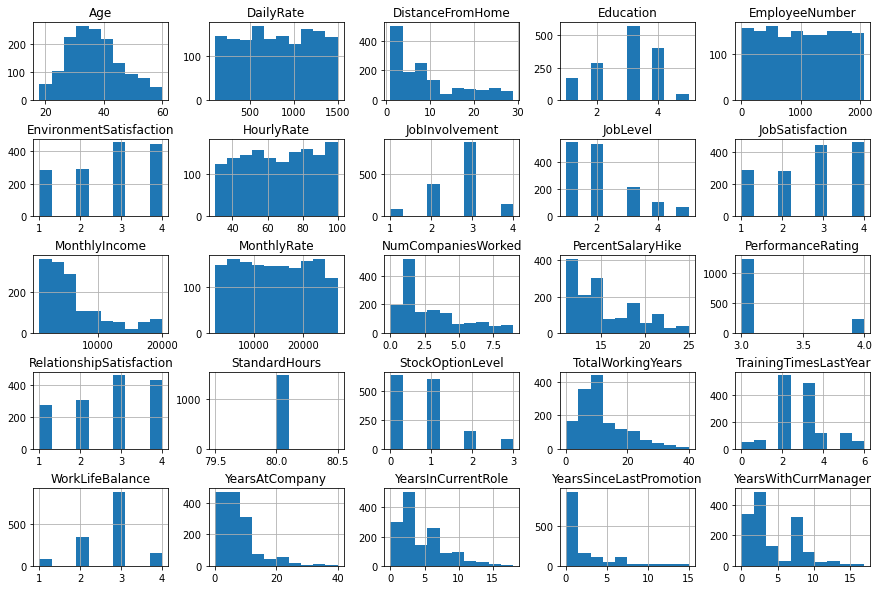

In [24]:
#checking variable distributions for anything out of the ordinary. Will investigate performance rating further,
#it appears to only have two values.
ibm_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [25]:
#PerformanceRating does indeed have just 2 values. This may make it less useful for analysis but will leave it for now.
ibm_data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64